In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

%matplotlib inline

In [2]:
task1_image_filenames = [
    "TESI00.BMP",
    "TESI01.BMP",
    "TESI12.BMP",
    "TESI21.BMP",
    "TESI31.BMP",
    "TESI33.BMP"]

In [3]:
index = 1

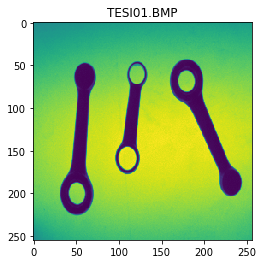

In [4]:
image = cv2.imread("../data/" + task1_image_filenames[index], cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.title(task1_image_filenames[index])
plt.show()

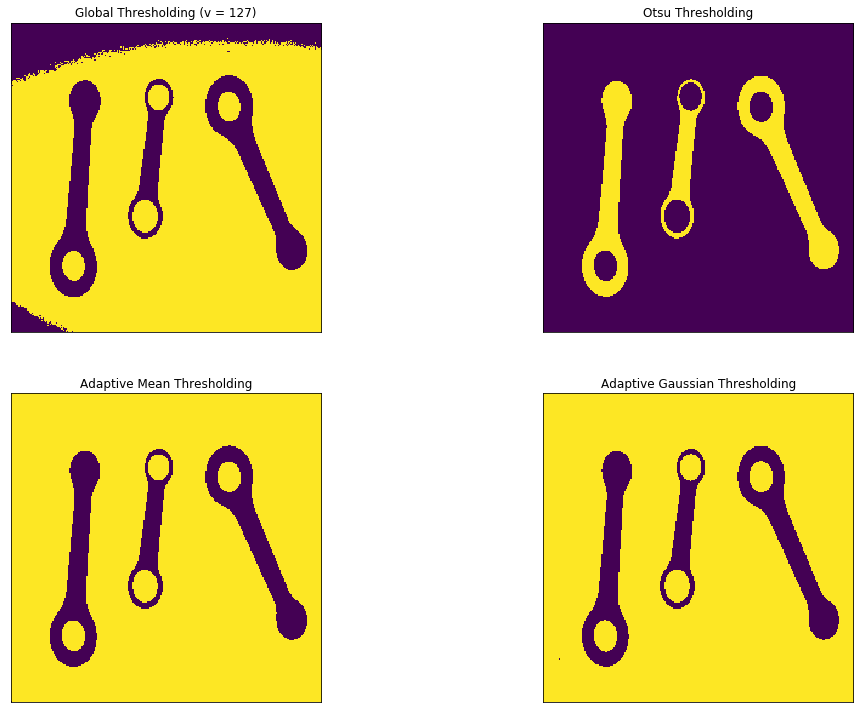

In [5]:
binay_threshold = 127
ret_binary, th_binary = cv2.threshold(image, binay_threshold, 255, cv2.THRESH_BINARY)
ret_otsu, th_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
th_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 47, 14)
th_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 47, 14)

titles = ['Global Thresholding (v = ' + str (binay_threshold) + ')', 'Otsu Thresholding', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th_binary, th_otsu, th_mean, th_gaussian]

plt.figure(figsize=(17.5, 12.5))

for i, img in enumerate(images):
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
rod_connectivity = 4
rod_num, rod_labelled_image, rod_info, rod_centroids = cv2.connectedComponentsWithStats(th_otsu, rod_connectivity, cv2.CV_32S)
labels = np.unique(rod_labelled_image)

In [7]:
background_label = np.argmax(rod_info[:,4])

In [8]:
rods = []

for label in labels:
    if label != background_label:
        rod = {"index":label}
        rods.append(rod)
        
        rods[-1]["area"] = rod_info[label][4]
        rods[-1]["centroid"] = rod_centroids[label]
        
        rod_image = th_otsu.copy()
        rod_image[rod_labelled_image == label] = 255
        rod_image[rod_labelled_image != label] = 0
        
        hole_image = rod_image + 255
        hole_image[hole_image != 255] = 0

        hole_connectivity = 4
        hole_num, hole_labelled_image, hole_info, hole_centroids = cv2.connectedComponentsWithStats(hole_image, hole_connectivity, cv2.CV_32S)
        
        # Possible use of
        # circularity = (Perimeter .^ 2) ./ (4 * pi * area);
        
        rods[-1]["type"] = "A"
        rods[-1]["hole"] = []
        
        for index, area in enumerate(np.sort(hole_info[:,4])):
            if index > 1:
                rods[-1]["hole"].append({"diameter":math.sqrt((hole_info[index,4] / math.pi)) * 2, "centre":hole_centroids[index]})
                if index - 2 == 1:
                    rods[-1]["type"] = "B"
                elif index - 2 > 1:
                    print("Error")
                    break
                
        if rods[-1]["hole"] == []:
            print("Error")
            

plt.show()
rods

[{'index': 1,
  'area': 3253,
  'centroid': array([201.30802336, 119.02490009]),
  'type': 'A',
  'hole': [{'diameter': 22.111625566165472,
    'centre': array([178.97135417,  68.77083333])}]},
 {'index': 2,
  'area': 1497,
  'centroid': array([115.19438878, 114.03273213]),
  'type': 'B',
  'hole': [{'diameter': 20.806283791440396,
    'centre': array([121.07941176,  60.26470588])},
   {'diameter': 24.279825147895533,
    'centre': array([109.93520518, 158.96112311])}]},
 {'index': 3,
  'area': 3275,
  'centroid': array([ 54.80671756, 141.30931298]),
  'type': 'A',
  'hole': [{'diameter': 22.111625566165472,
    'centre': array([ 50.9765625 , 199.89322917])}]}]